https://www.science-emergence.com/Codes/Plot-CloudSat-radar-reflectivity-using-python-and-matplotlib/

In [28]:
import sys
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python')
import createFolder as cF

from pyhdf.SD import SD, SDC # To read a HDF file (SD data)
from pyhdf.HDF import *
from pyhdf.VS import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.axes_grid1 import make_axes_locatable
import pylab

import pandas as pd
import time
import glob

In [29]:


savefig = 1

In [30]:
import pprint

In [31]:
stn_lat      = 59.81
stn_lon      = 7.21

lower_lat = stn_lat -1.
upper_lat = stn_lat +1.

left_lon = stn_lon -1.
right_lon = stn_lon +1.

In [32]:
ym = [201611, 201612, 201701, 201702, 201703]


In [33]:
def findSubsetIndices(min_lat,max_lat,min_lon,max_lon,lats,lons):
    
    """Array to store the results returned from the function"""
    res=np.zeros((4),dtype=np.float64)
    minLon=min_lon; maxLon=max_lon
    
    distances1 = []; distances2 = []
    indices=[]; index=1
    
    for point in lats:
        s1 = max_lat-point # (vector subtract)
        s2 = min_lat-point # (vector subtract)
        distances1.append((np.dot(s1, s1), point, index))
        distances2.append((np.dot(s2, s2), point, index-1))
        index=index+1
        
    distances1.sort()
    distances2.sort()
    indices.append(distances1[0])
    indices.append(distances2[0])
    
    distances1 = []; distances2 = []; index=1
   
    for point in lons:
        s1 = maxLon-point # (vector subtract)
        s2 = minLon-point # (vector subtract)
        distances1.append((np.dot(s1, s1), point, index))
        distances2.append((np.dot(s2, s2), point, index-1))
        index=index+1
        
    distances1.sort()
    distances2.sort()
    indices.append(distances1[0])
    indices.append(distances2[0])
    
    """ Save final product: max_lat_indices,min_lat_indices,max_lon_indices,min_lon_indices"""
    minJ=indices[1][2] # min_lat_indices
    maxJ=indices[0][2]
    minI=indices[3][2]
    maxI=indices[2][2] # max_lon_indices
    
    res[0]=minI; res[1]=maxI; res[2]=minJ; res[3]=maxJ;
    return res

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

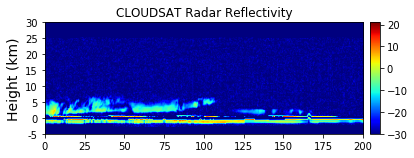

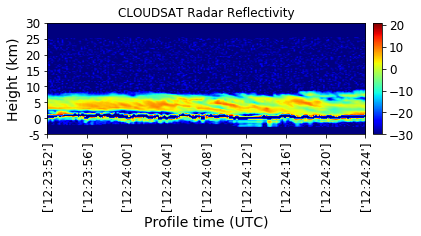

[('Profile_time', '', 7, 20690, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20690, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20690, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20690, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20690, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20690, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20690, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20690, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20690, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20690, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20690, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20690, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20690, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20690, 1, 0, 1, 1962, 0),
 ('MODI

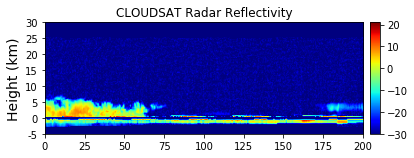

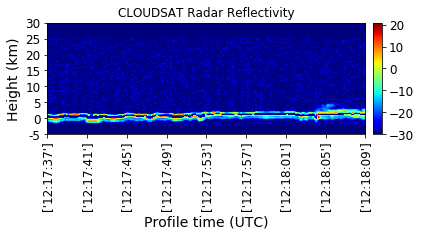

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

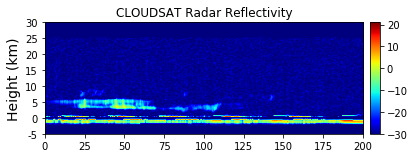

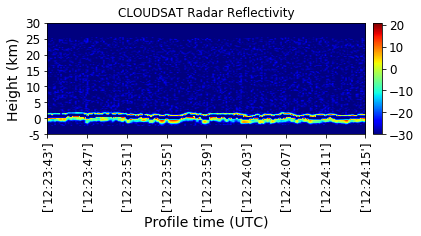

[('Profile_time', '', 7, 20690, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20690, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20690, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20690, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20690, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20690, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20690, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20690, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20690, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20690, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20690, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20690, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20690, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20690, 1, 0, 1, 1962, 0),
 ('MODI

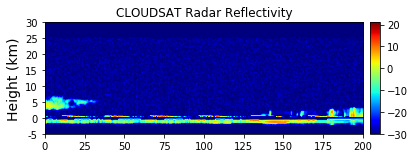

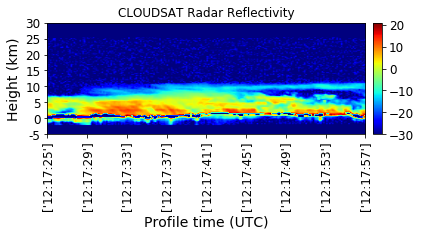

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

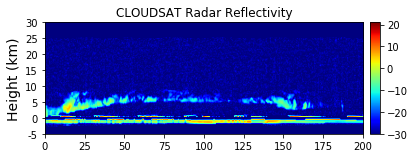

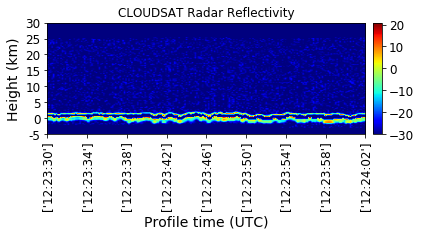

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

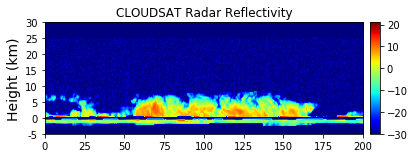

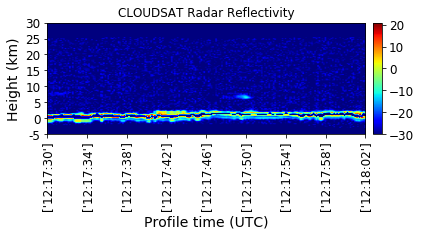

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

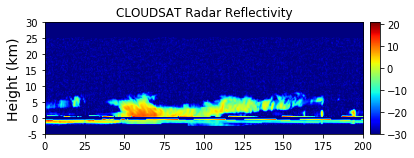

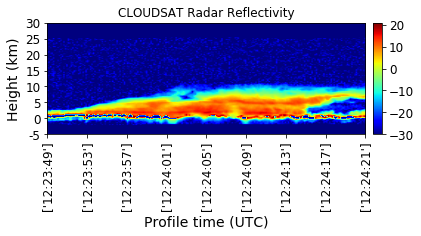

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

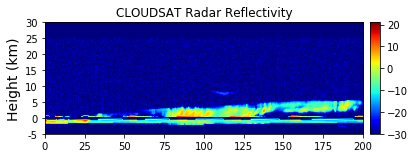

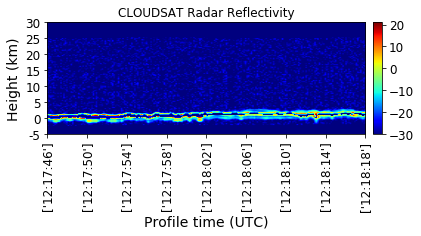

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

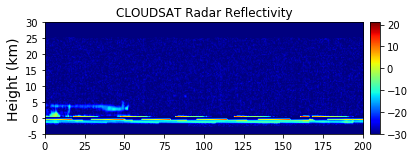

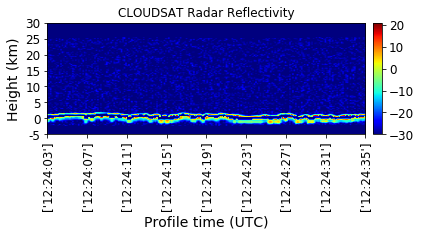

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

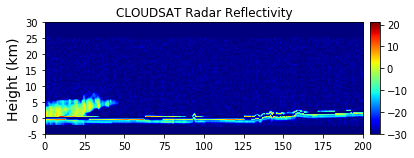

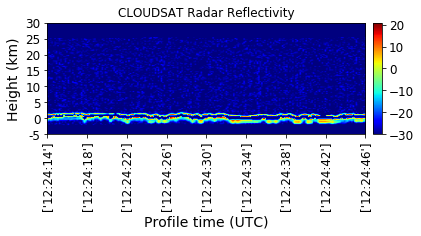

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

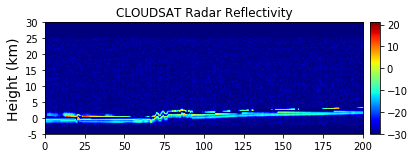

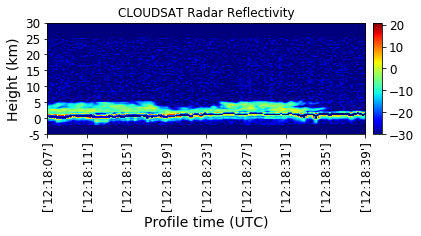

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

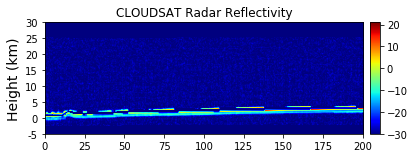

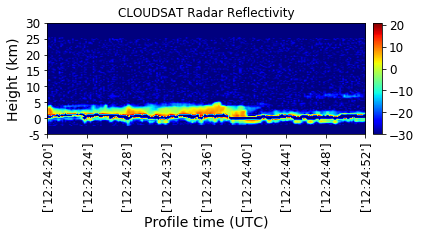

[('Profile_time', '', 7, 20679, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20679, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20679, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20679, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20679, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20679, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20679, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20679, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20679, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20679, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20679, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20679, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20679, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20679, 1, 0, 1, 1962, 0),
 ('MODI

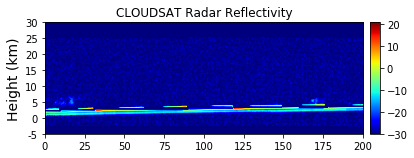

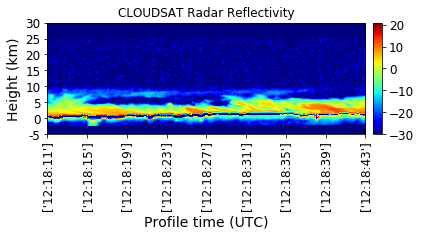

[('Profile_time', '', 7, 20690, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20690, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20690, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20690, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20690, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20690, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20690, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20690, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20690, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20690, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20690, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20690, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20690, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20690, 1, 0, 1, 1962, 0),
 ('MODI

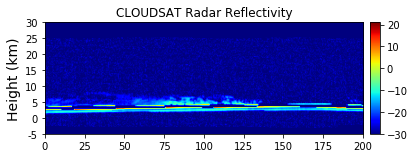

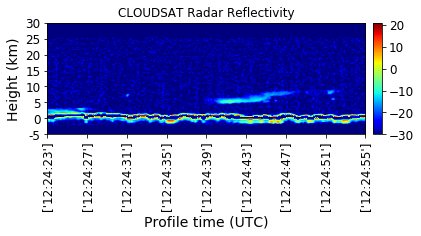

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

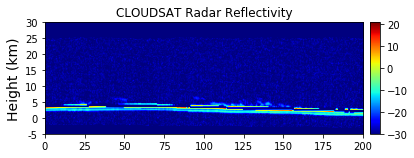

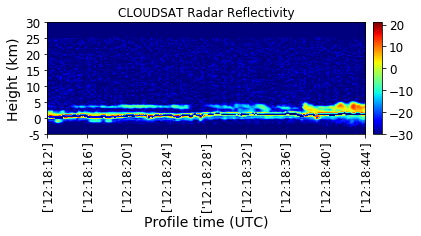

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

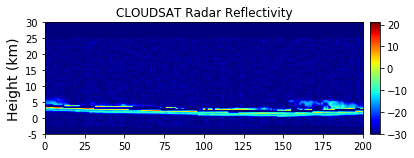

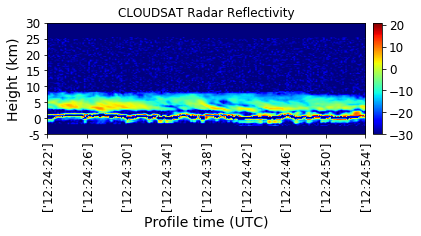

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20678, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20678, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20678, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20678, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20678, 1, 0, 1, 1962, 0),
 ('MODI

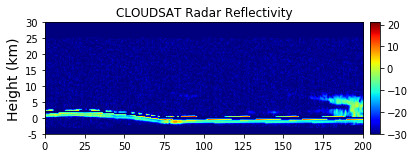

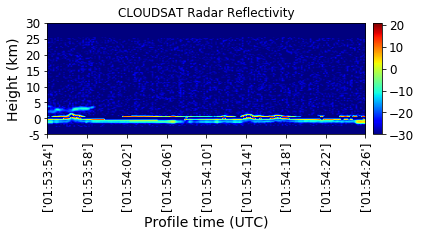

[('Profile_time', '', 7, 20690, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20690, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20690, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 20690, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 20690, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 20690, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 20690, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 20, 20690, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin', '', 21, 20690, 1, 0, 1, 1962, 0),
 ('SurfaceHeightBin_fraction', '', 22, 20690, 1, 0, 4, 1962, 0),
 ('Sigma-Zero', '', 29, 20690, 1, 0, 2, 1962, 0),
 ('MODIS_cloud_flag', '', 30, 20690, 1, 0, 1, 1962, 0),
 ('MODIS_Cloud_Fraction', '', 31, 20690, 1, 0, 1, 1962, 0),
 ('MODIS_scene_char', '', 32, 20690, 1, 0, 1, 1962, 0),
 ('MODI

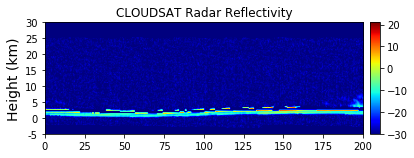

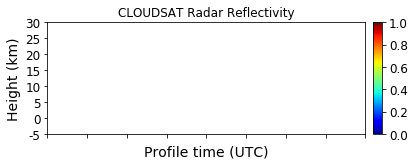

In [34]:
for year_month in ym:
    if year_month == 201611:
        granule = [56087, 56218, 56320]
    if year_month == 201612:
        granule = [56451, 56553, 56684,56786]
    if year_month == 201701:
        granule = [56917,57019,57252]
    if year_month == 201702:
        granule = [57383, 57485,57616]
    if year_month == 201703:
        granule = [57718, 57849,57951,58032,58082]
    targetfolder = '../../Data/CloudSat/GEOPROF/%s/' %year_month    

    for gg in granule:
        for file in glob.glob(targetfolder+'*%s_CS_2B-GEOPROF_GRANULE_P_R04_E06.hdf' %gg):
#---------- Read HDF Files (VD data) ----------#

            f = HDF(file) 
            vs = f.vstart() 
            data_info_list = vs.vdatainfo()
            pprint.pprint(data_info_list)

            Latitude = vs.attach('Latitude')
            Longitude = vs.attach('Longitude')
            Profile_time = vs.attach('Profile_time')
            UTC_start = vs.attach('UTC_start')
            TAI_start = vs.attach('TAI_start')

            Lat = Latitude[:]
            Lon = Longitude[:]
            Ptime = Profile_time[:]
            UTC = UTC_start[:]
            TAI = TAI_start[:]

            Latitude.detach() # "close" the vdata
            Longitude.detach() # "close" the vdata
            Profile_time.detach()
            UTC_start.detach()
            TAI_start.detach()

            vs.end() # terminate the vdata interface
            f.close() 

#---------- Read HDF Files ----------#
        for file in glob.glob(targetfolder+'*%s_CS_2B-GEOPROF_GRANULE_P_R04_E06.hdf' %gg):
            cpr_2b_geoprof = SD(file, SDC.READ)
            datasets_dic = cpr_2b_geoprof.datasets()

            sds_dic = {}
            for key, value in datasets_dic.items():
                sds_dic[value[3]] = key
            pprint.pprint( sds_dic)

        cpr_2b_geoprof_height = cpr_2b_geoprof.select('Height')
        #cpr_2b_geoprof_cloud_mask = cpr_2b_geoprof.select('CPR_Cloud_mask')
        cpr_2b_geoprof_radar_reflectivity = cpr_2b_geoprof.select('Radar_Reflectivity')

        cpr_2b_geoprof_height_data = cpr_2b_geoprof_height.get()
        #cpr_2b_geoprof_cloud_mask_data = cpr_2b_geoprof_cloud_mask.get()
        cpr_2b_geoprof_radar_reflectivity_data = cpr_2b_geoprof_radar_reflectivity.get()




        img = np.zeros((800,125))
        img.fill(-30)

        for i in np.arange(800):
            for j in np.arange(125):
                k = int( 125 * (cpr_2b_geoprof_height_data[i,j] + 5000) / 35000 )
                if cpr_2b_geoprof_radar_reflectivity_data[i,j] > -3000 and \
                       cpr_2b_geoprof_radar_reflectivity_data[i,j] < 2100:
                    img[i,k] = cpr_2b_geoprof_radar_reflectivity_data[i,j] / 100

        ax = plt.subplot(111)
        im = ax.imshow(img.T, interpolation='bilinear', cmap=cm.jet, origin='lower', extent=[0,200,-10,60])

        plt.title( 'CLOUDSAT Radar Reflectivity' )

        plt.ylabel('Height (km)',fontsize=14)
        pylab.yticks([-10,0,10,20,30,40,50,60], [-5,0,5,10,15,20,25,30])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="3%", pad=0.10)
        plt.colorbar(im, cax=cax)

        #plt.savefig("cloudsat_radar_reflectivity.png")
        plt.show()



        res = findSubsetIndices(lower_lat,upper_lat,left_lon,right_lon,np.array(Lat),np.array(Lon))

        Hlat = Lat[int(res[2]) : int(res[3])]
    
        Htime = Ptime[int(res[2]) : int(res[3])]

        Hlon = Lon[int(res[2]) : int(res[3])]

        data = cpr_2b_geoprof_radar_reflectivity_data[int(res[2]) : int(res[3]),:]

        height = cpr_2b_geoprof_height_data[int(res[2]) : int(res[3]),:]

        time_label = []
        for i in range(0,np.array(Htime).shape[0],25):
            time_label.append([time.strftime("%H:%M:%S", time.gmtime(sum(np.array(Htime[i]),np.array(UTC[0]))))])


        img = np.zeros((data.shape[0],data.shape[1]))
        img.fill(-30)

        for i in np.arange(data.shape[0]):
            for j in np.arange(data.shape[1]):
                k = int( data.shape[1] * (height[i,j] + 5000) / 35000 )
                if data[i,j] > -3000 and \
                       data[i,j] < 2100:
                    img[i,k] = data[i,j] / 100

        ax = plt.subplot(111)
        im = ax.imshow(img.T, interpolation='bilinear',  #vmin = -10, vmax = 30, 
                       cmap=cm.jet, origin='lower', extent=[0,200,-10,60])
        plt.title( 'CLOUDSAT Radar Reflectivity' )

        plt.ylabel('Height (km)',fontsize=14)
        plt.xlabel('Profile time (UTC)',fontsize=14)
        #ax.set_ylim((-10,10))
        pylab.yticks([-10,0,10,20,30,40,50,60], [-5,0,5,10,15,20,25,30],fontsize=12)
        pylab.xticks([0,25,50,75,100,125,150,175,200], time_label, rotation = 90,fontsize =12)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="3%", pad=0.10)
        plt.colorbar(im, cax=cax)
        cax.tick_params(labelsize=12)

        #plt.savefig("cloudsat_radar_reflectivity.png")
        if savefig == 1:
            fi = file.split('/')
            split_file = fi[-1].split('_')
        
            fig_dir = '../../Figures/CloudSat_Radar_Reflectivity/%s/2deg/' %(year_month)
            cF.createFolder(fig_dir)
            fig_name = '%s_%s.png' %(split_file[0],split_file[1]) 
            plt.savefig(fig_dir+fig_name  , bbox_inches='tight', dpi=200)
        plt.show()